In [1]:
from datetime import datetime, timedelta
from pathlib import Path

import itertools

from vivarium import Artifact, InteractiveContext
import ipywidgets
import pandas as pd, numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 8)

This notebook was run on model version 4.5 (x-factor implementation)

The purpose of this notebook is to develop code to test the correlation between child wasting and child stunting exposures at initialization and 6 months later. For this version, there should be no correlation between wasting and stunting exposures because risk-risk correlation has not yet been built into the model.

- 1.0 Initialize interactive simulation 
- 1.1 Calculate odds of stunting based on wasting at initialization 
- 1.2 WHZ and HAZ propensity correlation coefficient at initialization
- 1.3 Z-score correlations at initialization

- 2.0 Run simulation for X months
- 2.1 Calculate odds of stunting based on wasting at X months
- 2.2 WHZ and HAZ propensity correlation coefficient at X months
- 2.3 Z-score correlations at X months

# 1.1 Initialize interactive simulation

In [2]:
path = Path('/ihme/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/model_specifications/ciff_sam.yaml')
path

PosixPath('/ihme/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/model_specifications/ciff_sam.yaml')

In [3]:
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf')

In [4]:
sim = InteractiveContext(path)

2021-10-12 14:25:58.384 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering metrics.1.population_manager.metrics as modifier to metrics
2021-10-12 14:25:58.385 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:65 - Running simulation from artifact located at /ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf.
2021-10-12 14:25:58.386 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:66 - Artifact base filter terms are ['draw == 0'].
2021-10-12 14:25:58.387 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:67 - Artifact additional filter terms are None.
2021-10-12 14:25:59.125 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline cause_specific_mortality_rate
2021-10-12 14:25:59.126 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mortality_rate
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-

2021-10-12 14:26:04.258 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering measles.incidence_rate.1.risk_effect.risk_factor.child_wasting.cause.measles.incidence_rate.adjust_target as modifier to measles.incidence_rate
2021-10-12 14:26:04.259 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering measles.incidence_rate.paf.1.lookup_table_38 as modifier to measles.incidence_rate.paf
2021-10-12 14:26:04.493 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering lower_respiratory_infections.incidence_rate.1.risk_effect.risk_factor.child_wasting.cause.lower_respiratory_infections.incidence_rate.adjust_target as modifier to lower_respiratory_infections.incidence_rate
2021-10-12 14:26:04.494 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering lower_respiratory_infections.incidence_rate.paf.1.lookup_table_40 as modifier to lower_respiratory_infections.incidence_rate.paf
2021-10-12 14

2021-10-12 14:26:09.068 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.disability_weight
2021-10-12 14:26:09.069 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering disability_weight.4.mild_child_wasting.disability_weight as modifier to disability_weight
2021-10-12 14:26:09.071 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.excess_mortality_rate
2021-10-12 14:26:09.072 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.excess_mortality_rate.population_attributable_fraction
2021-10-12 14:26:09.073 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering mortality_rate.4.riskstate.mild_child_wasting.adjust_mortality_rate as modifier to mortality_rate
2021-10-12 14:26:09.417 | DEBUG    | vivarium.framework.values:_register_value_producer

In [5]:
pop0 = sim.get_population()
pop0

,tracked,cause_of_death,years_of_life_lost,alive,location,sex,entrance_time,age,exit_time,sq_lns_propensity,...,measles,measles_event_time,measles_event_count,susceptible_to_measles_event_count,susceptible_to_measles_event_time,diarrheal_diseases,diarrheal_diseases_event_count,diarrheal_diseases_event_time,susceptible_to_diarrheal_diseases_event_time,susceptible_to_diarrheal_diseases_event_count
0,True,not_dead,0.0,alive,Ethiopia,Male,2021-12-31 12:00:00,2.761284,NaT,0.712233,...,susceptible_to_measles,NaT,0,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
1,True,not_dead,0.0,alive,Ethiopia,Male,2021-12-31 12:00:00,2.863263,NaT,0.977566,...,susceptible_to_measles,NaT,0,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
2,True,not_dead,0.0,alive,Ethiopia,Female,2021-12-31 12:00:00,3.291584,NaT,0.593985,...,susceptible_to_measles,NaT,0,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
3,True,not_dead,0.0,alive,Ethiopia,Female,2021-12-31 12:00:00,4.900417,NaT,0.114471,...,susceptible_to_measles,NaT,0,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,True,not_dead,0.0,alive,Ethiopia,Female,2021-12-31 12:00:00,3.859252,NaT,0.299879,...,susceptible_to_measles,NaT,0,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
9997,True,not_dead,0.0,alive,Ethiopia,Female,2021-12-31 12:00:00,0.070874,NaT,0.803991,...,susceptible_to_measles,NaT,0,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
9998,True,not_dead,0.0,alive,Ethiopia,Female,2021-12-31 12:00:00,4.425916,NaT,0.964687,...,susceptible_to_measles,NaT,0,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
9999,True,not_dead,0.0,alive,Ethiopia,Male,2021-12-31 12:00:00,4.304582,NaT,0.134923,...,susceptible_to_measles,NaT,0,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0


In [6]:
cgf = pd.concat([pop0.loc[:, ['age', 'sex', 'child_wasting']], 
           sim.get_value('child_stunting.exposure')(pop0.index),
           sim.get_value('child_stunting.propensity')(pop0.index)], axis=1)
cgf

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399
...,...,...,...,...,...
9996,3.859252,Female,moderate_acute_malnutrition,cat4,0.805273
9997,0.070874,Female,mild_child_wasting,cat4,0.809186
9998,4.425916,Female,susceptible_to_child_wasting,cat3,0.539346
9999,4.304582,Male,susceptible_to_child_wasting,cat4,0.651469


# 1.2. Calculate odds of stunting based on wasting at initialization

This is used for external validation. See reference in:
https://vivarium-research.readthedocs.io/en/latest/gbd2019_models/risk_risk_correlation/wasting_and_stunting/index.html

In [7]:
cgf['wasted'] = np.where(cgf.child_wasting.str.contains('acute_malnutrition'), True, False)
cgf['stunted'] = np.where(cgf['risk_factor.child_stunting_exposure'].isin(['cat1','cat2']), True, False)
cgf.head()

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023,True,True
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954,False,False
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537,False,False
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399,False,False
4,0.797290,Male,mild_child_wasting,cat1,0.010056,False,True


In [8]:
def calculate_OR_of_stunting_among_wasted(data, age_start, age_end):
    data_sub = data.loc[data.age<age_end].loc[data.age>age_start]

    wasted_odds = (len(data_sub.loc[data_sub.wasted==True].loc[data_sub.stunted==True]) 
                   / len(data_sub.loc[data_sub.wasted==True].loc[data_sub.stunted==False]))
    not_wasted_odds = (len(data_sub.loc[data_sub.wasted==False].loc[data_sub.stunted==True]) 
                       / len(data_sub.loc[data_sub.wasted==False].loc[data_sub.stunted==False]))
    return wasted_odds / not_wasted_odds

In [9]:
calculate_OR_of_stunting_among_wasted(cgf, 28/365, 0.5)

0.977233676975945

In [10]:
calculate_OR_of_stunting_among_wasted(cgf, 0.5, 1)

1.0927188940092165

In [11]:
calculate_OR_of_stunting_among_wasted(cgf, 1, 2)

1.5824015556635878

In [12]:
calculate_OR_of_stunting_among_wasted(cgf, 2, 5)

0.8082847793119963

In [13]:
calculate_OR_of_stunting_among_wasted(cgf, 0.5, 5)

0.9559114925213219

In [33]:
cgf.head()

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted,age_group,mild_child_wasting,moderate_acute_malnutrition,severe_acute_malnutrition,susceptible_to_child_wasting,child_wasting_propensity,whz,haz
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023,True,True,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.015421,-2.841168,-2.241848
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.815255,0.995599,4.403881
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.305519,-0.634327,-1.208442
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.887237,1.365273,-0.533507
4,4.285787,Female,susceptible_to_child_wasting,cat1,0.021513,False,True,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.316772,-0.595119,-4.518704


In [38]:
cgf.loc[(cgf.age>1) & (cgf.age<2)].loc[cgf.wasted==True].loc[cgf.stunted==True]

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted,age_group,mild_child_wasting,moderate_acute_malnutrition,severe_acute_malnutrition,susceptible_to_child_wasting,child_wasting_propensity,whz,haz
6932,1.094453,Male,moderate_acute_malnutrition,cat1,0.180444,True,True,1_to_2_years,0.209109,0.087169,0.01665,0.687071,0.017015,-1.079616,-0.611922
6948,1.560634,Male,severe_acute_malnutrition,cat2,0.233345,True,True,1_to_2_years,0.209109,0.087169,0.01665,0.687071,0.007687,-1.636927,-0.270254
6968,1.342166,Male,moderate_acute_malnutrition,cat2,0.244641,True,True,1_to_2_years,0.209109,0.087169,0.01665,0.687071,0.101360,0.264653,-0.203041
6979,1.297376,Male,moderate_acute_malnutrition,cat2,0.221486,True,True,1_to_2_years,0.209109,0.087169,0.01665,0.687071,0.051709,-0.267453,-0.343069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,1.683217,Male,moderate_acute_malnutrition,cat2,0.265846,True,True,1_to_2_years,0.209109,0.087169,0.01665,0.687071,0.068796,-0.046209,-0.079816
8863,1.464616,Male,severe_acute_malnutrition,cat2,0.318331,True,True,1_to_2_years,0.209109,0.087169,0.01665,0.687071,0.016128,-1.118824,0.211442
8875,1.053733,Male,moderate_acute_malnutrition,cat1,0.184896,True,True,1_to_2_years,0.209109,0.087169,0.01665,0.687071,0.083534,0.107822,-0.581116
8905,1.243409,Male,moderate_acute_malnutrition,cat2,0.202203,True,True,1_to_2_years,0.209109,0.087169,0.01665,0.687071,0.102817,0.275855,-0.466293


# 1.3. WHZ and HAZ propensity correlation coefficient at initialization

NOTE: there is currently no child wasting initialization propensity in the state table or the pipelines. We will need this in order to calculate the correlation coefficients. Currently, I assigned a random propensity based on each simulant's wasting exposure state.

In [14]:
cgf.head()

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023,True,True
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954,False,False
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537,False,False
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399,False,False
4,0.797290,Male,mild_child_wasting,cat1,0.010056,False,True


In [15]:
cgf['age_group'] = np.where(cgf.age<6/365,'early_neonatal',
                           np.where(cgf.age<28/365,'post_neonatal',
                                   np.where(cgf.age<0.5,'1_to_5_months',
                                           np.where(cgf.age<1, '6_to_11_months',
                                                   np.where(cgf.age<2,'1_to_2_years','2_to_5_years')))))
cgf.head()

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted,age_group
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023,True,True,2_to_5_years
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954,False,False,2_to_5_years
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537,False,False,2_to_5_years
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399,False,False,2_to_5_years
4,0.797290,Male,mild_child_wasting,cat1,0.010056,False,True,6_to_11_months


In [16]:
pcts = pd.crosstab(index=cgf['age_group'], columns=cgf['child_wasting'], normalize='index').reset_index()#.drop(columns='child_wasting')
pcts

child_wasting,age_group,mild_child_wasting,moderate_acute_malnutrition,severe_acute_malnutrition,susceptible_to_child_wasting
0,1_to_2_years,0.209109,0.087169,0.016650,0.687071
1,1_to_5_months,0.194079,0.096491,0.032895,0.676535
2,2_to_5_years,0.211179,0.069147,0.011893,0.707781
3,6_to_11_months,0.222904,0.102249,0.019427,0.655419
4,early_neonatal,0.139535,0.093023,0.069767,0.697674
5,post_neonatal,0.187050,0.079137,0.028777,0.705036


In [17]:
cgf = cgf.merge(pcts, on='age_group')
cgf

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted,age_group,mild_child_wasting,moderate_acute_malnutrition,severe_acute_malnutrition,susceptible_to_child_wasting
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023,True,True,2_to_5_years,0.211179,0.069147,0.011893,0.707781
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.016200,Male,susceptible_to_child_wasting,cat4,0.246416,False,False,early_neonatal,0.139535,0.093023,0.069767,0.697674
9997,0.013505,Male,susceptible_to_child_wasting,cat4,0.748483,False,False,early_neonatal,0.139535,0.093023,0.069767,0.697674
9998,0.012292,Female,susceptible_to_child_wasting,cat4,0.971857,False,False,early_neonatal,0.139535,0.093023,0.069767,0.697674
9999,0.012934,Male,mild_child_wasting,cat4,0.059126,False,False,early_neonatal,0.139535,0.093023,0.069767,0.697674


In [18]:
# for now, apply a dummy propensity based on child wasting exposure category
import random

# apply propensities
cgf['child_wasting_propensity'] = np.nan
for i in cgf.index:
    if cgf.child_wasting[i]=='severe_acute_malnutrition':
        cgf['child_wasting_propensity'][i] = random.uniform(0,cgf['severe_acute_malnutrition'][i])
    elif cgf.child_wasting[i]=='moderate_acute_malnutrition':
        cgf['child_wasting_propensity'][i] = random.uniform(cgf['severe_acute_malnutrition'][i], 
                                                            cgf['severe_acute_malnutrition'][i]+cgf['moderate_acute_malnutrition'][i])
    elif cgf.child_wasting[i]=='mild_child_wasting':
        cgf['child_wasting_propensity'][i] = random.uniform(cgf['severe_acute_malnutrition'][i]+cgf['moderate_acute_malnutrition'][i], 
                                                            cgf['severe_acute_malnutrition'][i]+cgf['moderate_acute_malnutrition'][i]+cgf['mild_child_wasting'][i])
    else: 
        cgf['child_wasting_propensity'][i] = random.uniform(cgf['severe_acute_malnutrition'][i]+cgf['moderate_acute_malnutrition'][i]+cgf['mild_child_wasting'][i], 
                                                            1)
cgf.head()

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted,age_group,mild_child_wasting,moderate_acute_malnutrition,severe_acute_malnutrition,susceptible_to_child_wasting,child_wasting_propensity
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023,True,True,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.015421
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.815255
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.305519
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.887237
4,4.285787,Female,susceptible_to_child_wasting,cat1,0.021513,False,True,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.316772


Text(0.5, 1.0, 'Child growth failure propensities at initialization: All ages')

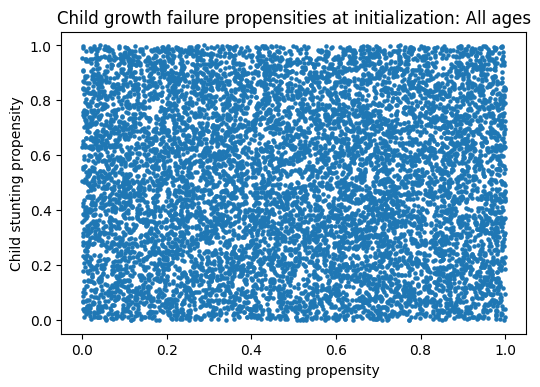

In [19]:
import matplotlib.pyplot as plt
plt.figure(dpi=100)
plt.scatter(cgf.child_wasting_propensity, cgf.child_stunting_propensity, s=5)
plt.xlabel('Child wasting propensity')
plt.ylabel('Child stunting propensity')
plt.title('Child growth failure propensities at initialization: All ages')

<AxesSubplot:xlabel='child_wasting_propensity', ylabel='child_stunting_propensity'>

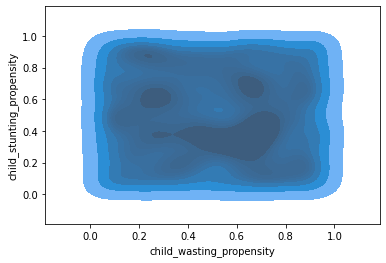

In [20]:
sns.kdeplot(
    data=cgf, x="child_wasting_propensity", y="child_stunting_propensity", 
    palette="crest", fill=True, levels=10,
    #cbar=True
)

# 1.4. Z-score correlations

NOTE: z-scores are not actually used in our simulation. I wanted to test the difference between correlation in wasting and stunting propensities with the correlation of wasting and stunting z-scores as a methods check confirmation. Notably, the wasting z-scores used for this methods check do not reflect the wasting exposure distributions used in the simulation for the 1 month to two year age groups -- keep this in mind!!

In [21]:
haz = pd.read_csv('/snfs1/Project/simulation_science/ciff_malnutrition/Data/cgf_data/stunting_age_disaggregated.csv')
haz = haz.loc[haz.year_id==2020]
haz['xpoints'] = haz.xpoints-10
haz['age_start'] = np.where(haz.age_group_id==2, 0,
                           np.where(haz.age_group_id==3, 6/365,
                                   np.where(haz.age_group_id==388, 28/365,
                                           np.where(haz.age_group_id==389, 0.5,
                                                   np.where(haz.age_group_id==238, 1, 2)))))
haz['age_end'] = np.where(haz.age_group_id==2, 6/365,
                           np.where(haz.age_group_id==3, 28/365,
                                   np.where(haz.age_group_id==388, 0.5,
                                           np.where(haz.age_group_id==389, 1,
                                                   np.where(haz.age_group_id==238, 2, 5)))))
haz.head()

,xpoints,pdf.points,cdf.points,max.flag,location_id,age_group_id,year_id,sex_id,location_name,sd.val,mean.val,index,age_start,age_end
900000,-7.000000,0.000000,0.000000e+00,0,179,2,2020,3,Ethiopia,1.812285,-0.458712,181,0.0,0.016438
900001,-6.997199,0.000176,2.457863e-07,0,179,2,2020,3,Ethiopia,1.812285,-0.458712,181,0.0,0.016438
900002,-6.994399,0.000176,7.386230e-07,0,179,2,2020,3,Ethiopia,1.812285,-0.458712,181,0.0,0.016438
900003,-6.991598,0.000177,1.233911e-06,0,179,2,2020,3,Ethiopia,1.812285,-0.458712,181,0.0,0.016438
900004,-6.988798,0.000178,1.730539e-06,0,179,2,2020,3,Ethiopia,1.812285,-0.458712,181,0.0,0.016438


Text(0, 0.5, 'WHZ')

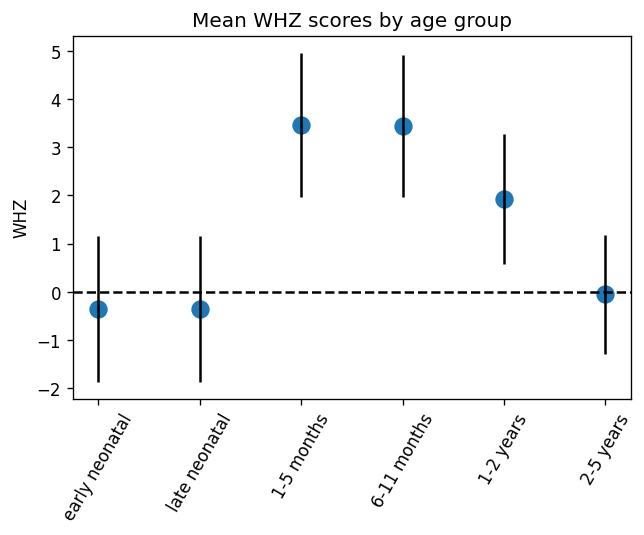

In [22]:
whz = pd.read_csv('/snfs1/Project/simulation_science/ciff_malnutrition/Data/cgf_data/wasting_age_disaggregated.csv')
whz = whz.loc[whz.year_id==2020]
whz['xpoints'] = whz['xpoints'] - 10
whz['age_start'] = np.where(whz.age_group_id==2, 0,
                           np.where(whz.age_group_id==3, 6/365,
                                   np.where(whz.age_group_id==388, 28/365,
                                           np.where(whz.age_group_id==389, 0.5,
                                                   np.where(whz.age_group_id==238, 1, 2)))))
whz['age_end'] = np.where(whz.age_group_id==2, 6/365,
                           np.where(whz.age_group_id==3, 28/365,
                                   np.where(whz.age_group_id==388, 0.5,
                                           np.where(whz.age_group_id==389, 1,
                                                   np.where(whz.age_group_id==238, 2, 5)))))
whz.head()


p = whz.loc[whz['cdf.points']==0]
plt.figure(dpi=120)
plt.scatter([0,1,2,3,4,5], p['mean.val'], s=100)
plt.axhline(y=0, linestyle='dashed', c='black')
plt.xticks([0,1,2,3,4,5], 
           ['early neonatal','late neonatal','1-5 months','6-11 months','1-2 years','2-5 years'],
           rotation=60)
plt.bar([0,1,2,3,4,5], p['mean.val'], yerr=p['sd.val'], width=0)
plt.title('Mean WHZ scores by age group')
plt.ylabel('WHZ')

In [23]:
whz.loc[whz.xpoints.round(6)==-3.003601]

,xpoints,pdf.points,cdf.points,max.flag,location_id,age_group_id,year_id,sex_id,location_name,sd.val,mean.val,index,age_start,age_end
901427,-3.003601,0.049060,0.037756,0,179,2,2020,3,Ethiopia,1.512047,-0.362003,181,0.000000,0.016438
906427,-3.003601,0.048508,0.037291,0,179,3,2020,3,Ethiopia,1.511862,-0.352693,182,0.016438,0.076712
911427,-3.003601,0.000338,0.000211,0,179,388,2020,3,Ethiopia,1.495528,3.466660,183,0.076712,0.500000
916427,-3.003601,0.000313,0.000192,0,179,389,2020,3,Ethiopia,1.472346,3.445092,184,0.500000,1.000000
921427,-3.003601,0.001541,0.000954,0,179,238,2020,3,Ethiopia,1.349788,1.920354,185,1.000000,2.000000
926427,-3.003601,0.019037,0.011900,0,179,34,2020,3,Ethiopia,1.239511,-0.049978,186,2.000000,5.000000


## NOTE: WHZ values from this dataframe are inconsistent with the artifact values of SAM exposure 

Ideally we should find WHZ/HAZ score data that is more consistent with the exposure data? Could this be a result of the fitting/squeezing performed in the GBD modeling when the ensemble distribution shape is then adjusted to fit with the exposure category envelopes?

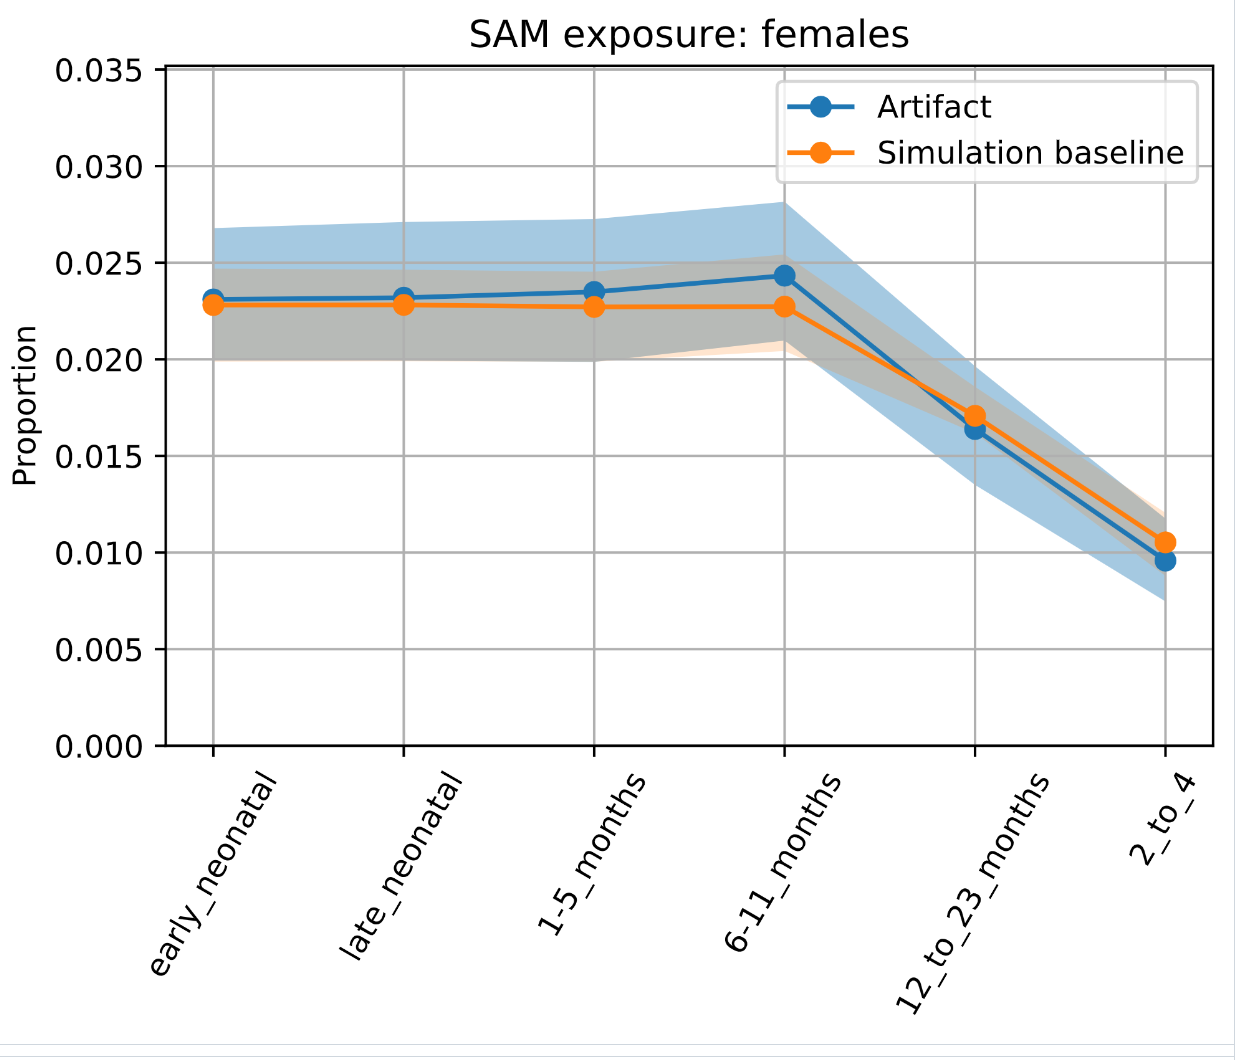

In [24]:
# test if this other dataframe also has this same issue
whz_raked = pd.read_csv('/snfs1/Project/simulation_science/ciff_malnutrition/Data/cgf_data/whz_scores_age_raked.csv')
whz_raked['age_start'] = np.where(whz_raked.age_group_id==4, 0, 1)
whz_raked['age_end'] = np.where(whz_raked.age_group_id==4, 1, 5)
whz_raked.head()

,xpoints,pdf_points,cdf_points,age_group_id,age_start,age_end,location_name,sex_id,year_id
0,-7.000000,0.000000e+00,0.000000e+00,4,0,1,Ethiopia,3,2019
1,-7.000000,0.000000e+00,0.000000e+00,5,1,5,Ethiopia,3,2019
2,-6.997199,7.897610e-08,1.105887e-10,4,0,1,Ethiopia,3,2019
3,-6.997199,6.563434e-06,9.190646e-09,5,1,5,Ethiopia,3,2019
4,-6.994399,7.970347e-08,3.327845e-10,4,0,1,Ethiopia,3,2019


In [25]:
whz_raked.loc[whz_raked.cdf_points.round(3)==0.500]

,xpoints,pdf_points,cdf_points,age_group_id,age_start,age_end,location_name,sex_id,year_id
5247,0.345869,0.273792,0.499956,5,1,5,Ethiopia,3,2019
7472,3.462893,0.286598,0.500077,4,0,1,Ethiopia,3,2019


In [26]:
pd.options.mode.chained_assignment = None  # default='warn'
cgf['whz'] = np.nan
cgf['haz'] = np.nan
for i in cgf.index:
    cgf['whz'][i] = (whz.loc[whz.age_start <= cgf.age[i]]
                   .loc[whz.age_end > cgf.age[i]]
                   .loc[whz['cdf.points'] <= cgf.child_wasting_propensity[i], 'xpoints'].tail(1).values[0])
    cgf['haz'][i] = (haz.loc[haz.age_start <= cgf.age[i]]
                   .loc[haz.age_end > cgf.age[i]]
                   .loc[haz['cdf.points'] <= cgf.child_stunting_propensity[i], 'xpoints'].tail(1).values[0])
cgf.head()

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted,age_group,mild_child_wasting,moderate_acute_malnutrition,severe_acute_malnutrition,susceptible_to_child_wasting,child_wasting_propensity,whz,haz
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023,True,True,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.015421,-2.841168,-2.241848
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.815255,0.995599,4.403881
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.305519,-0.634327,-1.208442
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.887237,1.365273,-0.533507
4,4.285787,Female,susceptible_to_child_wasting,cat1,0.021513,False,True,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.316772,-0.595119,-4.518704


In [27]:
cgf.loc[cgf.age>0.5].groupby(['child_wasting']).describe()['whz']

,count,mean,std,min,25%,50%,75%,max
child_wasting,,,,,,,,
mild_child_wasting,1888.0,-0.261795,1.301594,-1.729346,-1.177636,-0.866773,0.798160,2.911182
moderate_acute_malnutrition,685.0,-1.187374,1.350824,-3.000800,-2.233447,-1.838568,-0.012603,1.788158
severe_acute_malnutrition,123.0,-2.596518,1.437418,-5.613723,-3.567914,-3.126825,-1.377876,0.236647
susceptible_to_child_wasting,6210.0,1.387572,1.573528,-0.676335,0.124625,1.006801,2.370674,7.000000


In [28]:
cgf.groupby(['risk_factor.child_stunting_exposure']).describe()['haz']

,count,mean,std,min,25%,50%,75%,max
risk_factor.child_stunting_exposure,,,,,,,,
cat1,1571.0,-2.932421,1.346938,-6.815163,-3.740148,-3.157632,-2.363673,1.026405
cat2,1875.0,-1.349445,1.358850,-2.785157,-2.317463,-1.947790,-0.327666,2.079416
cat3,2083.0,-0.045042,1.517275,-1.723745,-1.303661,-0.830366,1.114623,3.093219
cat4,4471.0,2.696511,2.539362,-4.781956,0.428486,2.390278,4.415083,7.000000


In [29]:
def plot_whz_haz_kde(age_start,age_end):
    plt.figure(dpi=120)
    sns.kdeplot(data=cgf.loc[(cgf.age>age_start) & (cgf.age<age_end)], 
                x="whz", y="haz", 
                palette="crest", fill=True, levels=100)
    plt.axvline(x=-3, linestyle='dashed', c='tab:orange')
    plt.axvline(x=-2, linestyle='dashed', c='tab:orange')
    plt.axvline(x=-1, linestyle='dashed', c='tab:orange')
    plt.axhline(y=-3, linestyle='dashed', c='tab:orange')
    plt.axhline(y=-2, linestyle='dashed', c='tab:orange')
    plt.axhline(y=-1, linestyle='dashed', c='tab:orange')
    plt.xlabel('WHZ')
    plt.ylabel('HAZ')
    plt.title(f'WHZ and HAZ: {age_start} to {age_end} years')
    plt.ylim(-7.5,7.5)
    plt.xlim(-7.5,7.5)

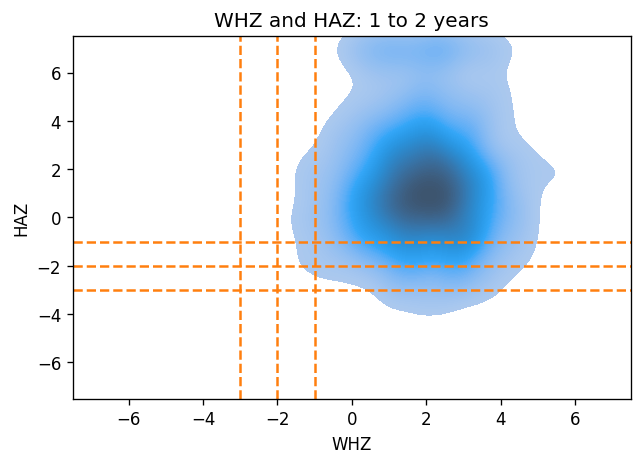

In [30]:
plot_whz_haz_kde(1,2)

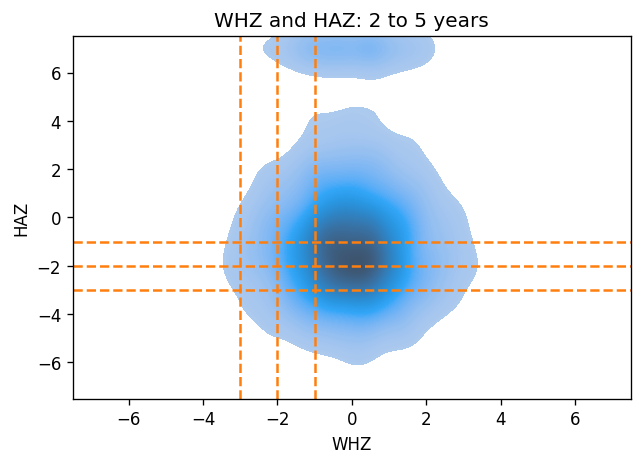

In [31]:
plot_whz_haz_kde(2,5)

# 2.0 Run simulation for 4 months 

NOTE: x-factor is currently set to 1.3

In [32]:
# set simulation run time to four months
# set x-factor to 1.3

sim.run()

# this took about an hour

2021-10-12 14:28:14.640 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-01 00:00:00
2021-10-12 14:28:17.558 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-01 12:00:00
2021-10-12 14:28:20.369 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-02 00:00:00
2021-10-12 14:28:23.183 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-02 12:00:00
2021-10-12 14:28:25.961 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-03 00:00:00
2021-10-12 14:28:28.782 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-03 12:00:00
2021-10-12 14:28:31.623 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-04 00:00:00
2021-10-12 14:28:34.422 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-04 12:00:00
2021-10-12 14:28:37.178 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-05 00:00:00
2021-10-12 14:28:40.053 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-05 12:00:00
2021-10-12 14:28:42.883 | DEBUG    | vivarium.framework.engi

KeyboardInterrupt: 

In [ ]:
pop4 = sim.get_population()

In [ ]:
cgf4 = pd.concat([pop4.loc[:, ['age', 'sex', 'child_wasting']], 
           sim.get_value('child_stunting.exposure')(pop4.index),
           sim.get_value('child_stunting.propensity')(pop4.index)], axis=1)
cgf4

# 2.1. Odds of stunting by wasting at four months

In [ ]:
cgf4['wasted'] = np.where(cgf4.child_wasting.str.contains('acute_malnutrition'), True, False)
cgf4['stunted'] = np.where(cgf4['risk_factor.child_stunting_exposure'].isin(['cat1','cat2']), True, False)
cgf4.head()

In [ ]:
calculate_OR_of_stunting_among_wasted(cgf4, 28/365, 0.5)

In [ ]:
calculate_OR_of_stunting_among_wasted(cgf4, 0.5, 1)

In [ ]:
calculate_OR_of_stunting_among_wasted(cgf4, 1, 2)

In [ ]:
calculate_OR_of_stunting_among_wasted(cgf4, 2, 5)

In [ ]:
calculate_OR_of_stunting_among_wasted(cgf4, 28/365, 5)

In [ ]:
calculate_OR_of_stunting_among_wasted(cgf4, 0.5, 5)

# 2.2. Wasting and stunting propensity correlation at four months

In [ ]:
cgf4['age_group'] = np.where(cgf4.age<6/365,'early_neonatal',
                           np.where(cgf4.age<28/365,'post_neonatal',
                                   np.where(cgf4.age<0.5,'1_to_5_months',
                                           np.where(cgf4.age<1, '6_to_11_months',
                                                   np.where(cgf4.age<2,'1_to_2_years','2_to_5_years')))))
cgf4.head()

In [ ]:
pcts4 = pd.crosstab(index=cgf4['age_group'], columns=cgf4['child_wasting'], normalize='index').reset_index()#.drop(columns='child_wasting')
pcts4

In [ ]:
cgf4 = cgf4.merge(pcts4, on='age_group')
cgf4

In [ ]:
# for now, apply a dummy propensity based on child wasting exposure category
import random

# apply propensities
cgf4['child_wasting_propensity'] = np.nan
for i in cgf4.index:
    if cgf4.child_wasting[i]=='severe_acute_malnutrition':
        cgf4['child_wasting_propensity'][i] = random.uniform(0,cgf4['severe_acute_malnutrition'][i])
    elif cgf4.child_wasting[i]=='moderate_acute_malnutrition':
        cgf4['child_wasting_propensity'][i] = random.uniform(cgf4['severe_acute_malnutrition'][i], 
                                                            cgf4['severe_acute_malnutrition'][i]+cgf4['moderate_acute_malnutrition'][i])
    elif cgf4.child_wasting[i]=='mild_child_wasting':
        cgf4['child_wasting_propensity'][i] = random.uniform(cgf4['severe_acute_malnutrition'][i]+cgf4['moderate_acute_malnutrition'][i], 
                                                            cgf4['severe_acute_malnutrition'][i]+cgf4['moderate_acute_malnutrition'][i]+cgf4['mild_child_wasting'][i])
    else: 
        cgf4['child_wasting_propensity'][i] = random.uniform(cgf4['severe_acute_malnutrition'][i]+cgf4['moderate_acute_malnutrition'][i]+cgf4['mild_child_wasting'][i], 
                                                            1)
cgf4.head()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi=100)
plt.scatter(cgf4.child_wasting_propensity, cgf4.child_stunting_propensity, s=5)
plt.xlabel('Child wasting propensity')
plt.ylabel('Child stunting propensity')
plt.title('Child growth failure propensities at four months: All ages')

In [ ]:
sns.kdeplot(
    data=cgf4, x="child_wasting_propensity", y="child_stunting_propensity", 
    palette="crest", fill=True, levels=10,
    #cbar=True
)
plt.title('Child Wasting and Stunting Propensity correlation: all ages\nAt four months of run time')